<a href="https://colab.research.google.com/github/NaraaBold/ComputerVision/blob/main/Image_transformation_for_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'compVision/assignments/assignment1/'
FOLDERNAME = ''
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
import os
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))
os.chdir('/content/drive/MyDrive/{}'.format(FOLDERNAME))

Image matrix transformation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('')

# create figure to plot image to
plt.figure(figsize=(4,4))
plt.imshow(img)

Convert to gray image

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [ ]:
img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap='gray')

Affine Transformation using scipy

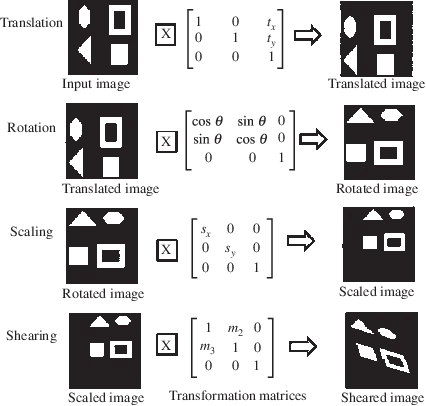

In [ ]:
from scipy import ndimage as ndi
h,w, c=img.shape

In [ ]:
mat_identity = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
img1 = ndi.affine_transform(img_gray, mat_identity)
plt.imshow(img1, cmap='gray')

Shearing

In [ ]:
lambda1 = 0.5
mat_shear = np.array([[1, lambda1, 0], [lambda1, 1, 0], [0, 0, 1]])
img3 = ndi.affine_transform(img_gray, mat_shear)

plt.imshow(img3, cmap='gray')

Scaling (Resizing)

In [ ]:
# scaling by factor 1 / s
s_x = 10
s_y = 10
mat_scale = np.array([[s_x, 0, 0], [0, s_y, 0], [0, 0, 1]])

output_shape = tuple((np.asarray((h/s_x, w/s_y))).astype(int))
scaled = np.ndarray(output_shape)
print (scaled.shape)

result = ndi.affine_transform(img_gray, mat_scale, output_shape=output_shape)

plt.imshow(result, cmap='gray')

In [ ]:
# scaling by factor 1 / s
s_x = 0.5
s_y = 0.5
mat_scale = np.array([[s_x, 0, 0], [0, s_y, 0], [0, 0, 1]])

output_shape = tuple((np.asarray((h/s_x, w/s_y, c))).astype(int))
scaled = np.ndarray(output_shape)
print (scaled.shape)

result = ndi.affine_transform(img, mat_scale, output_shape=output_shape)

plt.imshow(result)

Rotating

In [ ]:
theta = np.pi / 6 # 30 degrees in radians
mat_rotate = np.array([[1, 0, w/2], [0, 1, h/2], [0, 0, 1]]) @ np.array([[np.cos(theta), np.sin(theta), 0], [-np.sin(theta), np.cos(theta), 0], [0, 0, 1]]) @ np.array([[1, 0, -w/2], [0, 1, -h/2], [0, 0, 1]])
img2 = ndi.affine_transform(img_gray, mat_rotate)
plt.imshow(img2, cmap='gray')


Rotating and Reflecting an Image using numpy

To rotate or reflect and image we work directly on the matrix (numpy.array) itself. There are a number of numpy.array functions that will come in handy.

Rotate:

numpy.rot90(arr, k=1, axes=(0, 1)): Rotate an array arr by 90*k degrees counterclockwise in the plane specified by axes.

Flip:

numpy.flip(arr, axis = 0) : reverse the order of elements in an array along the given axis.

numpy.fliplr(arr) : Reverse the order of elements along axis 1 (left/right).

numpy.flipud(arr) : Reverse the order of elements along axis 0 (up/down).


In [ ]:
img_rot = np.rot90(img,-1)

# draw image
fig = plt.figure(figsize=(8,8))

fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('original')

fig.add_subplot(1,2,2)
plt.imshow(img_rot)
plt.title('rotated')

In [ ]:
img_flip = np.flip(img,axis = 0) # same as np.flipud(img)

# draw image
fig = plt.figure(figsize=(8,8))

fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('original')

fig.add_subplot(1,2,2)
plt.imshow(img_flip)
plt.title('flipped')

In [ ]:
img_flip = np.flip(img,axis = 1) # same as np.fliplr(img)

# draw image
fig = plt.figure(figsize=(8,8))

fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('original')

fig.add_subplot(1,2,2)
plt.imshow(img_flip)
plt.title('flipped')

In [ ]:
img_flip = np.flip(img,axis = 2) # same as permuting colour channels (2,1,0)

# draw image
fig = plt.figure(figsize=(8,8))

fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('original')

fig.add_subplot(1,2,2)
plt.imshow(img_flip)
plt.title('flipped')

In [ ]:
img_trans = np.transpose(img, axes=(1,0,2))

plt.imshow(img_trans)

Padding with black space

In [ ]:
img0 = np.pad(img,((100,100),(100,100),(0,0)), mode='constant', constant_values=0)
plt.imshow(img0)

Binarize an Image

In [ ]:
img_64 = (img > 64) * 255
img_128 = (img > 128) * 255
fig = plt.figure(figsize=(8, 8))
img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)

In [ ]:
img_64 = (img_gray > 64) * 255
img_128 = (img_gray > 128) * 255
fig = plt.figure(figsize=(8, 8))
img_all = np.concatenate((img_gray, img_64, img_128), axis=1)
plt.imshow(img_all, cmap='gray')